Team Id: PNT2022TMID05416

### **Project: Real-Time Communication system powered by AI for specially abled**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt #to view graph in colab itself
import IPython.display as display
from PIL import Image
import pathlib

In [ ]:
import tensorflow as tf
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Classroom/conversation engine for deaf and dumb.zip'

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory('/content/Dataset/training_set',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 15750 images belonging to 9 classes.


In [ ]:
x_test=test_datagen.flow_from_directory('/content/Dataset/test_set',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 2250 images belonging to 9 classes.


***Add Layers***

In [ ]:
model=Sequential()

**Add The Convolution Layer**

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))

**Add Pooling Layer**

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

**Add The Flatten Layer**

In [ ]:
model.add(Flatten())

**Adding The Dense Layers**

In [ ]:
#1st hidden layer
model.add(Dense(units=512,activation='relu'))
#2nd hidden layer
model.add(Dense(units=261,activation='relu'))

In [ ]:
model.add(Dense(units=9,activation='softmax'))

**Compile The Model**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

**Fit The Model**

In [ ]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
79/79 [==============================] - 90s 1s/step - loss: 0.5081 - accuracy: 0.8389 - val_loss: 0.2443 - val_accuracy: 0.9564
Epoch 2/10
79/79 [==============================] - 83s 1s/step - loss: 0.0607 - accuracy: 0.9837 - val_loss: 0.2357 - val_accuracy: 0.9742
Epoch 3/10
79/79 [==============================] - 82s 1s/step - loss: 0.0232 - accuracy: 0.9937 - val_loss: 0.2744 - val_accuracy: 0.9671
Epoch 4/10
79/79 [==============================] - 93s 1s/step - loss: 0.0163 - accuracy: 0.9961 - val_loss: 0.3158 - val_accuracy: 0.9756
Epoch 5/10
79/79 [==============================] - 101s 1s/step - loss: 0.0095 - accuracy: 0.9978 - val_loss: 0.3130 - val_accuracy: 0.9778
Epoch 6/10
79/79 [==============================] - 104s 1s/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.3312 - val_accuracy: 0.9769
Epoch 7/10
79/79 [==============================] - 100s 1s/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.3252 - val_accuracy: 0.9769
Epoch 8/10
79/79 

**Save The Model**

In [ ]:
model.save('aslpng2.h5')

**Import The Packages And Load The Saved Model**

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('aslpng2.h5')

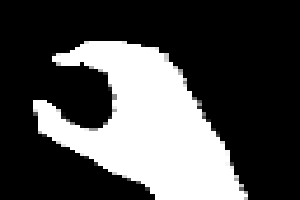

In [ ]:
img=image.load_img('/content/Dataset/test_set/C/15.png',target_size=(200,300))
img

## **Load The Test Image, Pre-Process It And Predict**

In [49]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])


In [50]:
arr= image.img_to_array(img)

1/1 [==============================] - 0s 34ms/step
THE PREDICTED LETTER IS  C


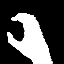

In [51]:
frame=cv2.imread('/content/Dataset/test_set/C/15.png')
data=detect(frame)
from google.colab.patches import cv2_imshow
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()